In [1]:
import os
import sys
import traceback
import weka.core.jvm as jvm
#import wekaexamples.helper as helper
from weka.core.converters import Loader
from weka.classifiers import Classifier

In [2]:
jvm.start()

DEBUG:weka.core.jvm:Adding bundled jars
DEBUG:weka.core.jvm:Classpath=['C:\\Users\\AK JAIN\\Anaconda3\\lib\\site-packages\\javabridge\\jars\\rhino-1.7R4.jar', 'C:\\Users\\AK JAIN\\Anaconda3\\lib\\site-packages\\javabridge\\jars\\runnablequeue.jar', 'C:\\Users\\AK JAIN\\Anaconda3\\lib\\site-packages\\javabridge\\jars\\cpython.jar', 'C:\\Users\\AK JAIN\\Anaconda3\\lib\\site-packages\\weka\\lib\\python-weka-wrapper.jar', 'C:\\Users\\AK JAIN\\Anaconda3\\lib\\site-packages\\weka\\lib\\weka.jar']
DEBUG:weka.core.jvm:MaxHeapSize=default
DEBUG:weka.core.jvm:Package support disabled
DEBUG:javabridge.jutil:Creating JVM object
DEBUG:javabridge.jutil:Signalling caller


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
data_dir = "C:/Users/AK JAIN/Documents/Wekadata/"

DEBUG:matplotlib:$HOME=C:\Users\AK JAIN
DEBUG:matplotlib:matplotlib data path C:\Users\AK JAIN\Anaconda3\lib\site-packages\matplotlib\mpl-data
DEBUG:matplotlib:loaded rc file C:\Users\AK JAIN\Anaconda3\lib\site-packages\matplotlib\mpl-data\matplotlibrc
DEBUG:matplotlib:matplotlib version 2.2.2
DEBUG:matplotlib:interactive is False
DEBUG:matplotlib:platform is win32
DEBUG:matplotlib:loaded modules: ['builtins', 'sys', '_frozen_importlib', '_imp', '_warnings', '_thread', '_weakref', '_frozen_importlib_external', '_io', 'marshal', 'nt', 'winreg', 'zipimport', 'encodings', 'codecs', '_codecs', 'encodings.aliases', 'encodings.utf_8', '_signal', '__main__', 'encodings.latin_1', 'io', 'abc', '_weakrefset', '_bootlocale', '_locale', 'encodings.cp1252', 'site', 'os', 'errno', 'stat', '_stat', 'ntpath', 'genericpath', 'os.path', '_collections_abc', '_sitebuiltins', 'sysconfig', 'types', 'functools', '_functools', 'collections', 'operator', '_operator', 'keyword', 'heapq', '_heapq', 'itertools', 

DEBUG:matplotlib:CACHEDIR=C:\Users\AK JAIN\.matplotlib
DEBUG:matplotlib.font_manager:Using fontManager instance from C:\Users\AK JAIN\.matplotlib\fontList.json
DEBUG:matplotlib.backends:backend module://ipykernel.pylab.backend_inline version unknown
DEBUG:matplotlib.backends:backend module://ipykernel.pylab.backend_inline version unknown
DEBUG:matplotlib.backends:backend module://ipykernel.pylab.backend_inline version unknown


In [4]:
loader = Loader(classname="weka.core.converters.ArffLoader")

In [5]:
data = loader.load_file(data_dir+"diabetes.arff")
data.class_is_last()

print(data)

@relation pima_diabetes

@attribute preg numeric
@attribute plas numeric
@attribute pres numeric
@attribute skin numeric
@attribute insu numeric
@attribute mass numeric
@attribute pedi numeric
@attribute age numeric
@attribute class {tested_negative,tested_positive}

@data
6,148,72,35,0,33.6,0.627,50,tested_positive
1,85,66,29,0,26.6,0.351,31,tested_negative
8,183,64,0,0,23.3,0.672,32,tested_positive
1,89,66,23,94,28.1,0.167,21,tested_negative
0,137,40,35,168,43.1,2.288,33,tested_positive
5,116,74,0,0,25.6,0.201,30,tested_negative
3,78,50,32,88,31,0.248,26,tested_positive
10,115,0,0,0,35.3,0.134,29,tested_negative
2,197,70,45,543,30.5,0.158,53,tested_positive
8,125,96,0,0,0,0.232,54,tested_positive
4,110,92,0,0,37.6,0.191,30,tested_negative
10,168,74,0,0,38,0.537,34,tested_positive
10,139,80,0,0,27.1,1.441,57,tested_negative
1,189,60,23,846,30.1,0.398,59,tested_positive
5,166,72,19,175,25.8,0.587,51,tested_positive
7,100,0,0,0,30,0.484,32,tested_positive
0,118,84,47,230,45.8,0.551,31,t

70.05208333333333

Correctly Classified Instances         538               70.0521 %
Incorrectly Classified Instances       230               29.9479 %
Kappa statistic                          0.2743
Mean absolute error                      0.3602
Root mean squared error                  0.4486
Relative absolute error                 79.2526 %
Root relative squared error             94.1238 %
Total Number of Instances              768     

=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 0.876    0.627    0.723      0.876    0.792      0.291    0.742     0.841     tested_negative
                 0.373    0.124    0.617      0.373    0.465      0.291    0.742     0.562     tested_positive
Weighted Avg.    0.701    0.451    0.686      0.701    0.678      0.291    0.742     0.744     



DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('C:\\Users\\AK JAIN\\Anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf') with score of 0.050000
DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans ('C:\\Users\\AK JAIN\\Anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf') with score of 0.050000


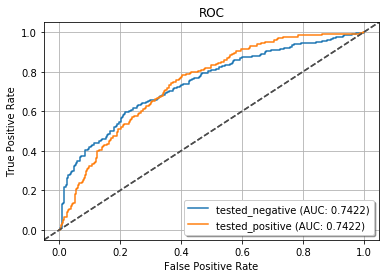

In [6]:
from weka.filters import Filter
remove = Filter(classname="weka.filters.unsupervised.attribute.Remove", options=["-R", "1-3"])

cls = Classifier(classname="weka.classifiers.bayes.NaiveBayes")

from weka.classifiers import FilteredClassifier
fc = FilteredClassifier()
fc.filter = remove
fc.classifier = cls

from weka.classifiers import Evaluation
from weka.core.classes import Random
evl = Evaluation(data)
evl.crossvalidate_model(fc, data, 10, Random(1))

print(evl.percent_correct)
print(evl.summary())
print(evl.class_details())

import weka.plot.classifiers as plcls  # NB: matplotlib is required
plcls.plot_roc(evl, class_index=[0, 1], wait=True)

In [7]:
cls.build_classifier(data)

for index, inst in enumerate(data):
    pred = cls.classify_instance(inst)
    dist = cls.distribution_for_instance(inst)
    print(str(index+1) + ": label index=" + str(pred) + ", class distribution=" + str(dist))

1: label index=1.0, class distribution=[0.3220771 0.6779229]
2: label index=0.0, class distribution=[0.98050439 0.01949561]
3: label index=1.0, class distribution=[0.18509793 0.81490207]
4: label index=0.0, class distribution=[0.98679765 0.01320235]
5: label index=1.0, class distribution=[2.08265738e-04 9.99791734e-01]
6: label index=0.0, class distribution=[0.94133134 0.05866866]
7: label index=0.0, class distribution=[0.97440724 0.02559276]
8: label index=1.0, class distribution=[0.31254752 0.68745248]
9: label index=1.0, class distribution=[7.94955153e-05 9.99920504e-01]
10: label index=0.0, class distribution=[0.97430599 0.02569401]
11: label index=0.0, class distribution=[0.84607495 0.15392505]
12: label index=1.0, class distribution=[0.09971453 0.90028547]
13: label index=1.0, class distribution=[0.03307222 0.96692778]
14: label index=1.0, class distribution=[1.05865733e-08 9.99999989e-01]
15: label index=1.0, class distribution=[0.27909426 0.72090574]
16: label index=0.0, class 

148: label index=1.0, class distribution=[0.44925267 0.55074733]
149: label index=1.0, class distribution=[0.39461279 0.60538721]
150: label index=0.0, class distribution=[0.98678417 0.01321583]
151: label index=0.0, class distribution=[0.57991288 0.42008712]
152: label index=0.0, class distribution=[0.95716714 0.04283286]
153: label index=1.0, class distribution=[0.03117397 0.96882603]
154: label index=1.0, class distribution=[0.0052955 0.9947045]
155: label index=1.0, class distribution=[0.0170683 0.9829317]
156: label index=1.0, class distribution=[0.11382183 0.88617817]
157: label index=0.0, class distribution=[0.98253037 0.01746963]
158: label index=0.0, class distribution=[0.95254624 0.04745376]
159: label index=0.0, class distribution=[0.98454704 0.01545296]
160: label index=1.0, class distribution=[8.03778175e-04 9.99196222e-01]
161: label index=0.0, class distribution=[0.57368459 0.42631541]
162: label index=0.0, class distribution=[0.67085044 0.32914956]
163: label index=0.0,

317: label index=0.0, class distribution=[0.98707898 0.01292102]
318: label index=1.0, class distribution=[0.35739992 0.64260008]
319: label index=0.0, class distribution=[0.83692176 0.16307824]
320: label index=1.0, class distribution=[0.08155204 0.91844796]
321: label index=0.0, class distribution=[0.78849051 0.21150949]
322: label index=0.0, class distribution=[0.94898251 0.05101749]
323: label index=0.0, class distribution=[0.93424656 0.06575344]
324: label index=1.0, class distribution=[0.06388341 0.93611659]
325: label index=0.0, class distribution=[0.94364644 0.05635356]
326: label index=0.0, class distribution=[0.81339546 0.18660454]
327: label index=0.0, class distribution=[0.79308638 0.20691362]
328: label index=1.0, class distribution=[0.07983044 0.92016956]
329: label index=0.0, class distribution=[0.86679026 0.13320974]
330: label index=0.0, class distribution=[0.89219901 0.10780099]
331: label index=1.0, class distribution=[0.18687398 0.81312602]
332: label index=0.0, cla

485: label index=1.0, class distribution=[0.18588591 0.81411409]
486: label index=1.0, class distribution=[0.48476155 0.51523845]
487: label index=1.0, class distribution=[0.02017824 0.97982176]
488: label index=1.0, class distribution=[0.00512008 0.99487992]
489: label index=0.0, class distribution=[0.97634181 0.02365819]
490: label index=1.0, class distribution=[0.02597549 0.97402451]
491: label index=0.0, class distribution=[0.95829077 0.04170923]
492: label index=0.0, class distribution=[0.91176893 0.08823107]
493: label index=0.0, class distribution=[0.9214486 0.0785514]
494: label index=1.0, class distribution=[0.49419886 0.50580114]
495: label index=0.0, class distribution=[0.9976373 0.0023627]
496: label index=1.0, class distribution=[0.26575442 0.73424558]
497: label index=0.0, class distribution=[0.95005944 0.04994056]
498: label index=0.0, class distribution=[0.97898933 0.02101067]
499: label index=1.0, class distribution=[0.04545288 0.95454712]
500: label index=1.0, class d

660: label index=0.0, class distribution=[0.70099127 0.29900873]
661: label index=1.0, class distribution=[0.16045022 0.83954978]
662: label index=1.0, class distribution=[0.00405146 0.99594854]
663: label index=1.0, class distribution=[0.01460898 0.98539102]
664: label index=1.0, class distribution=[0.14193811 0.85806189]
665: label index=0.0, class distribution=[0.76597552 0.23402448]
666: label index=0.0, class distribution=[0.88963061 0.11036939]
667: label index=1.0, class distribution=[0.48244029 0.51755971]
668: label index=0.0, class distribution=[0.78602167 0.21397833]
669: label index=0.0, class distribution=[0.73845547 0.26154453]
670: label index=1.0, class distribution=[0.30311043 0.69688957]
671: label index=1.0, class distribution=[0.13416713 0.86583287]
672: label index=0.0, class distribution=[0.98573784 0.01426216]
673: label index=0.0, class distribution=[0.6044526 0.3955474]
674: label index=1.0, class distribution=[0.17293346 0.82706654]
675: label index=0.0, class

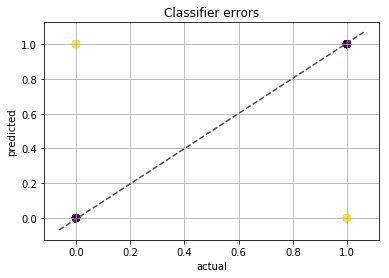

In [8]:
import weka.plot.classifiers as plcls  # NB: matplotlib is required
plcls.plot_classifier_errors(evl.predictions, wait=True)

In [9]:
from weka.classifiers import GridSearch
grid = GridSearch(options=["-sample-size", "100.0", "-traversal", "ROW-WISE", "-num-slots", "1", "-S", "1"])
grid.evaluation = "CC"
grid.y = {"property": "kernel.gamma", "min": -3.0, "max": 3.0, "step": 1.0, "base": 10.0, "expression": "pow(BASE,I)"}
grid.x = {"property": "C", "min": -3.0, "max": 3.0, "step": 1.0, "base": 10.0, "expression": "pow(BASE,I)"}
cls = Classifier(
    classname="weka.classifiers.functions.SMOreg",
    options=["-K", "weka.classifiers.functions.supportVector.RBFKernel"])
grid.classifier = cls
grid.build_classifier(train)
print("Model:\n" + str(grid))
print("\nBest setup:\n" + grid.best.to_commandline())

Failed to instantiate weka.classifiers.meta.GridSearch: weka.classifiers.meta.GridSearch


Exception: Failed to instantiate GridSearch - package installed and jvm started with package support?

In [9]:
jvm.stop()